In [ ]:
!pip install osmnx
!pip install requests
!pip install polycircles
!pip install simplekml
!pip install Taxicab
!pip install libpysal
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


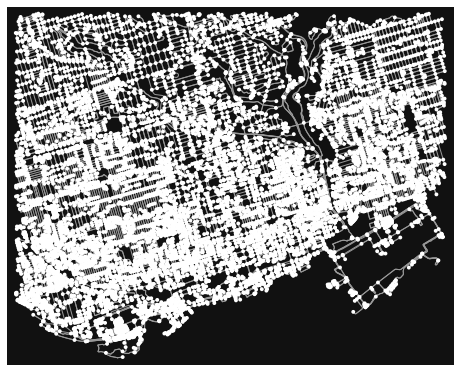

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
# New approach to get OSM map and convert it to graph


from shapely.geometry import Point, LineString
#import plotly_express as px
import networkx as nx
import  osmnx as ox
ox.config(use_cache=True, log_console=True)

def create_graph(loc, dist, transport_mode, loc_type="address"):
    """Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’"""
    if loc_type == "address":
            G = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
    elif loc_type == "points":
            G = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
    return G

filepath = "/content/drive/MyDrive/Colab Notebooks/QC_code/Shared Bike/piedmont.graphml"

# G = create_graph(["Toronto","Markham", "Vaughan", "Richmond Hill", "City of Toronto"], 20000, "bike")
#ox.save_graphml(G, filepath)
#ox.plot_graph(G)


# save/load graph as a graphml file: this is the best way to save your model
# for subsequent work later

#G = ox.load_graphml(filepath)


In [ ]:
ox.plot_graph(G)

In [ ]:
A = nx.adjacency_matrix(G)
#print(A.todense())
gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
#G2 = ox.utils_graph.graph_from_gdfs(gdf_nodes, gdf_edges)
#array_id = []
#for i in range(0,3260):
#  array_id.append(i)
#gdf_nodes.assign(id = array_id)


from libpysal import weights
import geopandas as gpd

queen_trj = weights.Queen.from_dataframe(gdf_nodes)
graph_trj = queen_trj.to_networkx()
adjacent = graph_trj.adj
print("test first node=" + str(adjacent[0]))
print("size=" + str(len(adjacent)))


List_adj_nodes = []
for i in range(0, len(adjacent)):
    #List_adj_nodes.append("new")
    each_node = []
    for item in adjacent[i]:
        each_node.append(item)
    List_adj_nodes.append(each_node)
print("final=" + str(List_adj_nodes))

# find adjacent nodes based on OSM id
list_adj_nodes_osm_id = []

for i in range (0, len(List_adj_nodes)):
  #print(str(i))
  list_adj_each_temporary = []
  for j in range (0, len(List_adj_nodes[i])):
    osm_id = gdf_nodes.iloc[List_adj_nodes[i][j],:].name
    list_adj_each_temporary.append(osm_id)
  list_adj_nodes_osm_id.append(list_adj_each_temporary)


list_adj_nodes_osm_id

with open("/content/drive/MyDrive/Colab Notebooks/QC_code/Shared Bike/road_network.txt", "w") as txt_file:
  for line in list_adj_nodes_osm_id:
    newlist = str(line).replace('[','').replace(']','').replace(',', '')
    print("line = "+newlist)
    txt_file.write("".join(str(newlist)) + "\n")

test first node={1: {'weight': 1.0}, 46814: {'weight': 1.0}, 46815: {'weight': 1.0}, 48459: {'weight': 1.0}, 50377: {'weight': 1.0}}
size=102451


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
line = 391883871 391884285 391890087 391912356 391913376 9397989442
line = 391903499 391912356 391913376 391915298 9397989440
line = 392185117 9328855465 9397989446 9956856022
line = 391891865 392185117 9328855466 9328855469 9397989443 9956856022
line = 7507433913 7507433915 8984022182 9397989480
line = 4032131331 4032131332 9397989480 9397989482 9825843676 9825843677 9825843680 9825843681 9825843812
line = 4032131332 7507433912 7507433913 8984022178 8984022182 8984022183 8984022184 9397989477 9397989479 9397989482
line = 4032131331 8984022184 9397989479 9397989480
line = 701446851 9397989493 9532455142 9532455145
line = 701446851 8983605171 9397989494 9397989496 9397989501 9532455145
line = 701446498 7507433925 8914483733 9397989484 9397989494 9532455142 9532455145
line = 7507433924 7507433925 9397989490 9397989493 9397989501 9532455145
line = 8983605171 8983605176 9397989490 9397989499 9397989501 9397989502
line = 701446463 685278618

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/QC_code/Shared Bike/road_network_graph_id.txt", "w") as txt_file:
  for line in List_adj_nodes:
    newlist = str(line).replace('[','').replace(']','').replace(',', '')
    print("line = "+newlist)
    txt_file.write("".join(str(newlist)) + "\n")

Streaming output truncated to the last 5000 lines.
line = 23708 23717 23823 24188 24212 97452
line = 24040 24188 24212 24247 97451
line = 24439 95989 97454 102300
line = 23857 24439 95990 95992 97453 102300
line = 87324 87325 93076 97457
line = 63180 63181 97457 97458 101006 101007 101010 101011 101028
line = 63181 87323 87324 93075 93076 93077 93078 97455 97456 97458
line = 63180 93078 97456 97457
line = 41005 97461 99417 99418
line = 41005 93054 97462 97463 97465 99418
line = 40908 87328 92694 97459 97462 99417 99418
line = 87327 87328 97460 97461 97465 99418
line = 93054 93055 97460 97464 97465 97466
line = 40899 81829 93055 93173 97463 97466 100211
line = 87327 97460 97462 97463 97466 97467
line = 40899 48826 67384 97463 97464 97465 97467
line = 48826 87327 97465 97466 97468
line = 48826 87327 87331 97467 97469
line = 48826 56540 87331 97468 97470 101032 101034
line = 56540 87331 97469 100998 101021 101022 101028
line = 50472 50480 50482 76696 91824 97473 97476
line = 50472 50474 5

In [ ]:
# if you want to work with your model in gephi, use gephi compatibility mode
#filepath = "/content/drive/MyDrive/Colab Notebooks/QC_code/Shared Bike/gephi2.graphml"
#ox.save_graphml(G, filepath=filepath, gephi=True)

In [ ]:
import requests
response = requests.get("https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information")

In [ ]:
import pandas as pd
data = response.json()
array_stations = data['data']['stations']

#data_test_create_dataframe=[['st_id','name',43,57,10]]
#df=pd.DataFrame(data_test_create_dataframe,columns=['station_id', 'name', 'lat', 'lon', 'capacity'])
array_id = []
array_name = []
array_lat = []
array_lon = []
array_capacity = []
for i in range(0, len(array_stations)):
  array_id.append(array_stations[i]['station_id'])
  array_name.append(array_stations[i]['name'])
  array_lat.append(array_stations[i]['lat'])
  array_lon.append(array_stations[i]['lon'])
  array_capacity.append(array_stations[i]['capacity'])
  #each_station = [array_stations[i]['station_id'], array_stations[i]['name'],array_stations[i]['lat'], array_stations[i]['lon'], array_stations[i]['capacity']]
obj_stations = {'station_id':array_id, 'name':array_name, 'lat':array_lat, 'lon':array_lon, 'capacity':array_capacity}
print(str(obj_stations))
df=pd.DataFrame(obj_stations)
df

{'station_id': ['7000', '7001', '7002', '7003', '7004', '7005', '7006', '7007', '7008', '7009', '7010', '7012', '7014', '7015', '7016', '7017', '7018', '7020', '7021', '7022', '7023', '7024', '7025', '7026', '7027', '7028', '7029', '7030', '7031', '7032', '7033', '7034', '7035', '7036', '7037', '7038', '7039', '7040', '7041', '7042', '7043', '7044', '7045', '7046', '7047', '7048', '7050', '7052', '7053', '7054', '7055', '7056', '7057', '7058', '7059', '7060', '7061', '7062', '7063', '7064', '7065', '7066', '7067', '7068', '7069', '7070', '7071', '7072', '7073', '7074', '7075', '7076', '7077', '7078', '7079', '7083', '7084', '7085', '7086', '7087', '7088', '7089', '7090', '7091', '7092', '7093', '7094', '7095', '7096', '7097', '7098', '7099', '7100', '7101', '7102', '7103', '7104', '7105', '7106', '7107', '7108', '7109', '7110', '7111', '7112', '7113', '7114', '7115', '7117', '7118', '7119', '7120', '7121', '7122', '7123', '7124', '7126', '7127', '7128', '7129', '7131', '7132', '7133', 

,station_id,name,lat,lon,capacity
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,35
1,7001,Wellesley Station Green P,43.664964,-79.383550,26
2,7002,St. George St / Bloor St W,43.667333,-79.399429,19
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761,15
4,7004,University Ave / Elm St,43.656518,-79.389099,11
...,...,...,...,...,...
624,7717,Niagara St / Portland St,43.642579,-79.400117,11
625,7718,St. Andrew's Playground Park,43.646151,-79.399821,11
626,7719,Wolseley St / Augusta Ave,43.648420,-79.400519,28
627,7720,King St W / Portland St,43.644395,-79.400654,16


In [ ]:
# match trajectory data to lat lon from df
# adding lat and lon for start and end stations
trj_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/QC_code/Shared Bike/small.csv")
trj_data = pd.DataFrame(trj_data)
start_lat = []
start_lon = []
end_lat = []
end_lon = []
for i in range(0, len(trj_data)):
  start_station_id = trj_data.loc[i,'Start Station Id']
  end_station_id = trj_data.loc[i,'End Station Id']
  start_lat.append(df.loc[start_station_id-7000, 'lat'])
  start_lon.append(df.loc[start_station_id-7000, 'lon'])
  end_lat.append(df.loc[end_station_id-7000, 'lat'])
  end_lon.append(df.loc[end_station_id-7000, 'lon'])
trj_data = trj_data.assign(start_lat=start_lat, start_lon=start_lon, end_lat=end_lat, end_lon = end_lon)


In [ ]:
trj_data

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,start_lat,start_lon,end_lat,end_lon
0,10644218,1315,7021,1/1/2021 0:04,Bay St / Albert St,7164,1/1/2021 0:26,Gould St / Yonge St (Ryerson University),6795,Annual Member,43.666630,-79.381480,43.653889,-79.441389
1,10644220,396,7534,1/1/2021 0:07,Walnut Ave / Queen St W,7524,1/1/2021 0:13,Lisgar Park,4176,Casual Member,43.779353,-79.193023,43.705670,-79.310554
2,10644221,86,7162,1/1/2021 0:10,Hayter St / Laplante Ave,7006,1/1/2021 0:11,Bay St / College St (East Side),1814,Annual Member,43.658203,-79.450930,43.660439,-79.385525
3,10644222,741,7003,1/1/2021 0:10,Madison Ave / Bloor St W,7272,1/1/2021 0:22,Yonge St / Dundonald St - SMART,198,Casual Member,43.667158,-79.402761,43.667208,-79.312315
4,10644223,2073,7562,1/1/2021 0:11,Priscilla Ave / Dundas St W - SMART,7562,1/1/2021 0:45,Priscilla Ave / Dundas St W - SMART,6688,Casual Member,43.685081,-79.314990,43.685081,-79.314990
5,10644224,1924,7442,1/1/2021 0:11,Lonsdale Rd / Spadina Rd,7256,1/1/2021 0:43,Vanauley St / Queen St W - SMART,196,Annual Member,43.613606,-79.488354,43.661673,-79.337789
6,10644225,473,7006,1/1/2021 0:12,Bay St / College St (East Side),7025,1/1/2021 0:19,Ted Rogers Way / Bloor St E,6882,Annual Member,43.660439,-79.385525,43.658200,-79.376800
7,10644226,265,7014,1/1/2021 0:13,Sherbourne St / Carlton St (Allan Gardens),7508,1/1/2021 0:17,Berkeley St / Dundas St E - SMART,6485,Annual Member,43.640978,-79.376785,43.772402,-79.467540
8,10644227,1079,7053,1/1/2021 0:13,Metro Hall Plaza,7079,1/1/2021 0:31,McGill St / Church St,5791,Casual Member,43.663700,-79.400053,43.684758,-79.316767
9,10644228,981,7528,1/1/2021 0:15,Spadina Rd / Austin Terrace - SMART,7481,1/1/2021 0:31,Westmount Ave / St Clair Ave W - SMART,2951,Casual Member,43.720645,-79.355474,43.617163,-79.497107


In [ ]:
array_start_lat = []
for i in range(0, len(trj_data.loc[:,'start_lat'])):
  array_start_lat.append(trj_data.loc[:,'start_lat'][i])

array_start_lon = []
for i in range(0, len(trj_data.loc[:,'start_lon'])):
  array_start_lon.append(trj_data.loc[:,'start_lon'][i])



array_end_lat = []
for i in range(0, len(trj_data.loc[:,'end_lat'])):
  array_end_lat.append(trj_data.loc[:,'end_lat'][i])

array_end_lon = []
for i in range(0, len(trj_data.loc[:,'end_lon'])):
  array_end_lon.append(trj_data.loc[:,'end_lon'][i])

In [ ]:
# finding the nearest node to each station
# G.nodes[8759752431]
start_nodes_array = ox.distance.nearest_nodes(G,array_start_lon, array_start_lat, return_dist=False)
trj_data = trj_data.assign(start_OSM_id = start_nodes_array)



end_nodes_array = ox.distance.nearest_nodes(G,array_end_lon, array_end_lat, return_dist=False)
trj_data = trj_data.assign(end_OSM_id = end_nodes_array)
trj_data


# find graph id of osm id
list_nodes = G.nodes
i = 0
array_start_node_id_graph = []
array_end_node_id_graph = []
for i in range(0, len(trj_data.loc[:,'end_lon'])):
  j = 0
  for osm_id in G.nodes:
    if osm_id == trj_data.loc[:,'start_OSM_id'][i]:
      array_start_node_id_graph.append(j)
      print("graph id start=" + str(j))
    if osm_id == trj_data.loc[:,'end_OSM_id'][i]:
      array_end_node_id_graph.append(j)
      print("graph id end=" + str(j))
    j= j+1



graph id end=630
graph id start=2810
graph id start=89966
graph id end=95691
graph id end=550
graph id start=37723
graph id end=2075
graph id start=2904
graph id start=2694
graph id end=2694
graph id end=3055
graph id start=53524
graph id start=550
graph id end=8948
graph id start=58984
graph id end=64152
graph id start=566
graph id end=8348
graph id end=57771
graph id start=78731
graph id end=57771
graph id start=78731
graph id start=1661
graph id end=12799
graph id start=41350
graph id end=61878
graph id end=3497
graph id start=43120
graph id start=211
graph id end=1106
graph id end=3497
graph id start=43120
graph id end=768
graph id start=58984
graph id end=50673
graph id start=58984
graph id start=211
graph id end=1106
graph id end=3497
graph id start=43120
graph id end=3497
graph id start=43120
graph id end=48204
graph id start=78906
graph id end=1099
graph id start=58807
graph id end=8348
graph id start=102344
graph id end=3022
graph id start=58984
graph id start=630
graph id end

In [ ]:
trj_data = trj_data.assign(start_node_id_graph = array_start_node_id_graph)
trj_data = trj_data.assign(end_node_id_graph = array_end_node_id_graph)

In [ ]:
# For each bike we need to find 5 alternative destination. We need to add End station Id 2, End station Id 3, End station Id4, End station Id5 , and their lat lon
from shapely.geometry import Point, Polygon
from polycircles import polycircles

import simplekml

In [ ]:
lat_alt1 = []
lon_alt1 = []
station_id_alt1 = []
capacity_alt1 = []

lat_alt2 = []
lon_alt2 = []
station_id_alt2 = []
capacity_alt2 = []

lat_alt3 = []
lon_alt3 = []
station_id_alt3 = []
capacity_alt3 = []

lat_alt4 = []
lon_alt4 = []
station_id_alt4 = []
capacity_alt4 = []

# for each row in trips(trajectory data), we should should find 5 destination.
for i in range(0, len(trj_data.loc[:,'end_lon'])):
  lat_each_trip = trj_data.loc[:,'end_lat'][i]
  lon_each_trip = trj_data.loc[:,'end_lon'][i]
  polycircle = polycircles.Polycircle(latitude = lat_each_trip, longitude = lon_each_trip, radius = 1000, number_of_vertices=5)
  s = list(polycircle)
  lat=[]
  lon= []
  coords=[]
  for value in s:
    lat.append(value['lat'])
    lon.append(value['lon'])

  for a, b in zip(lat, lon):
      coords.append([a,b])
  poly = Polygon(coords)

  # point in polygon problem to find 5 nearest station to the destination
  kk = 0

  for j in range(0 , len(df)):
    lat_station = df.loc[:,'lat'][j]
    lon_station = df.loc[:,'lon'][j]
    point_station = Point(lat_station, lon_station)
    # define kk to count only 5 nearest nodes

    if (poly.contains(point_station)) & (kk < 4):
      if kk==0:
        lat_alt1.append(lat_station)
        lon_alt1.append(lon_station)
        station_id_alt1.append(df.loc[:,'station_id'][j])
        capacity_alt1.append(df.loc[:,'capacity'][j])
      elif kk==1:
        lat_alt2.append(lat_station)
        lon_alt2.append(lon_station)
        station_id_alt2.append(df.loc[:,'station_id'][j])
        capacity_alt2.append(df.loc[:,'capacity'][j])
      elif kk==2:
        lat_alt3.append(lat_station)
        lon_alt3.append(lon_station)
        station_id_alt3.append(df.loc[:,'station_id'][j])
        capacity_alt3.append(df.loc[:,'capacity'][j])
      elif kk == 3:
        lat_alt4.append(lat_station)
        lon_alt4.append(lon_station)
        station_id_alt4.append(df.loc[:,'station_id'][j])
        capacity_alt4.append(df.loc[:,'capacity'][j])

      #print("j=" + str(j) + "station info = " + str(df.loc[j, :]))
      print("i="+ str(i) +  "    j=" + str(j))
      kk = kk + 1

    if j == len(df)-1:
      if kk == 0:
        # it means 0 stations found around the destination. So we add the original destination to all other 4 alternative stations
        lat_alt1.append(lat_each_trip)
        lon_alt1.append(lon_each_trip)
        station_id_alt1.append(trj_data.loc[:,'End Station Id'][i])
        capacity_alt1.append(0)

        lat_alt2.append(lat_each_trip)
        lon_alt2.append(lon_each_trip)
        station_id_alt2.append(trj_data.loc[:,'End Station Id'][i])
        capacity_alt2.append(0)

        lat_alt3.append(lat_each_trip)
        lon_alt3.append(lon_each_trip)
        station_id_alt3.append(trj_data.loc[:,'End Station Id'][i])
        capacity_alt3.append(0)

        lat_alt4.append(lat_each_trip)
        lon_alt4.append(lon_each_trip)
        station_id_alt4.append(trj_data.loc[:,'End Station Id'][i])
        capacity_alt4.append(0)

      elif kk == 1:
        # it means 1 stations found around the destination
        lat_alt2.append(lat_each_trip)
        lon_alt2.append(lon_each_trip)
        station_id_alt2.append(trj_data.loc[:,'End Station Id'][i])
        capacity_alt2.append(0)

        lat_alt3.append(lat_each_trip)
        lon_alt3.append(lon_each_trip)
        station_id_alt3.append(trj_data.loc[:,'End Station Id'][i])
        capacity_alt3.append(0)

        lat_alt4.append(lat_each_trip)
        lon_alt4.append(lon_each_trip)
        station_id_alt4.append(trj_data.loc[:,'End Station Id'][i])
        capacity_alt4.append(0)


      elif kk == 2:
        # it means 2 stations found around the destination
        lat_alt3.append(lat_each_trip)
        lon_alt3.append(lon_each_trip)
        station_id_alt3.append(trj_data.loc[:,'End Station Id'][i])
        capacity_alt3.append(0)

        lat_alt4.append(lat_each_trip)
        lon_alt4.append(lon_each_trip)
        station_id_alt4.append(trj_data.loc[:,'End Station Id'][i])
        capacity_alt4.append(0)

      elif kk == 3:
        # it means 3 stations found around the destination
        lat_alt4.append(lat_each_trip)
        lon_alt4.append(lon_each_trip)
        station_id_alt4.append(trj_data.loc[:,'End Station Id'][i])
        capacity_alt4.append(0)

      elif kk == 4:
        # it means 4 stations found around the destination and no need to do anything
        print("all 4 alternative have been found")
      print("############"+str(j))





i=0    j=137
i=0    j=158
i=0    j=163
i=0    j=164
all 4 alternative have been found
############628
i=1    j=523
i=1    j=524
############628
i=2    j=1
i=2    j=4
i=2    j=6
i=2    j=8
all 4 alternative have been found
############628
i=3    j=267
i=3    j=268
i=3    j=271
i=3    j=272
all 4 alternative have been found
############628
i=4    j=77
i=4    j=79
i=4    j=80
i=4    j=344
all 4 alternative have been found
############628
i=5    j=95
i=5    j=227
i=5    j=247
i=5    j=256
all 4 alternative have been found
############628
i=6    j=6
i=6    j=11
i=6    j=12
i=6    j=18
all 4 alternative have been found
############628
i=7    j=508
i=7    j=509
############628
i=8    j=79
i=8    j=80
i=8    j=344
i=8    j=372
all 4 alternative have been found
############628
i=9    j=409
i=9    j=442
i=9    j=480
i=9    j=481
all 4 alternative have been found
############628
i=10    j=409
i=10    j=442
i=10    j=480
i=10    j=481
all 4 alternative have been found
############628
i=11    j=124

In [ ]:
trj_data = trj_data.assign(lat_alt1=lat_alt1, lon_alt1 = lon_alt1,station_id_alt1=station_id_alt1, capacity_alt1 = capacity_alt1,
                           lat_alt2=lat_alt2, lon_alt2 = lon_alt2,station_id_alt2=station_id_alt2, capacity_alt2 = capacity_alt2,
                           lat_alt3=lat_alt3, lon_alt3 = lon_alt3,station_id_alt3=station_id_alt3, capacity_alt3 = capacity_alt3,
                           lat_alt4=lat_alt4, lon_alt4 = lon_alt4,station_id_alt4=station_id_alt4, capacity_alt4 = capacity_alt4)


OSM_id_alt1 = ox.distance.nearest_nodes(G,lon_alt1, lat_alt1, return_dist=False)
trj_data = trj_data.assign(OSM_id_alt1 = OSM_id_alt1)


OSM_id_alt2 = ox.distance.nearest_nodes(G,lon_alt2, lat_alt2, return_dist=False)
trj_data = trj_data.assign(OSM_id_alt2 = OSM_id_alt2)


OSM_id_alt3 = ox.distance.nearest_nodes(G,lon_alt3, lat_alt3, return_dist=False)
trj_data = trj_data.assign(OSM_id_alt3 = OSM_id_alt3)


OSM_id_alt4 = ox.distance.nearest_nodes(G,lon_alt4, lat_alt4, return_dist=False)
trj_data = trj_data.assign(OSM_id_alt4 = OSM_id_alt4)

In [ ]:
trj_data.loc[0,:]

Trip Id                                                10644218
Trip  Duration                                             1315
Start Station Id                                           7021
Start Time                                        1/1/2021 0:04
Start Station Name                           Bay St / Albert St
End Station Id                                             7164
End Time                                          1/1/2021 0:26
End Station Name       Gould St / Yonge St (Ryerson University)
Bike Id                                                    6795
User Type                                         Annual Member
start_lat                                              43.66663
start_lon                                             -79.38148
end_lat                                               43.653889
end_lon                                              -79.441389
start_OSM_id                                         6625519843
end_OSM_id                              

In [ ]:
# find graph id of alternative osm ids
list_nodes = G.nodes
i = 0
array_alt1_node_id_graph = []
array_alt2_node_id_graph = []
array_alt3_node_id_graph = []
array_alt4_node_id_graph = []
for i in range(0, len(trj_data.loc[:,'end_lon'])):
  j = 0
  for osm_id in G.nodes:
    if osm_id == trj_data.loc[:,'OSM_id_alt1'][i]:
      array_alt1_node_id_graph.append(j)
    if osm_id == trj_data.loc[:,'OSM_id_alt2'][i]:
      array_alt2_node_id_graph.append(j)
    if osm_id == trj_data.loc[:,'OSM_id_alt3'][i]:
      array_alt3_node_id_graph.append(j)
    if osm_id == trj_data.loc[:,'OSM_id_alt4'][i]:
      array_alt4_node_id_graph.append(j)
    j= j+1

In [ ]:
trj_data = trj_data.assign(alt1_node_id_graph = array_alt1_node_id_graph)
trj_data = trj_data.assign(alt2_node_id_graph = array_alt2_node_id_graph)
trj_data = trj_data.assign(alt3_node_id_graph = array_alt3_node_id_graph)
trj_data = trj_data.assign(alt4_node_id_graph = array_alt4_node_id_graph)


In [ ]:
######### Find all shortest path #######################################
'''def all_shortest_path(source, target):
    array_path = []
    #array_length =[]
    try:
         path = nx.all_shortest_paths(G, source=source, target=target)
         for path_test in nx.all_shortest_paths(G, source=source, target=target):
             array_path.append(path_test)
             print(path_test)
         #length = nx.shortest_path_length(graph_bei,source=source, target=target)
         #array_length.append(length)
    except nx.NetworkXNoPath:
         path = "No Path"
         length = "No Pathlength"
         array_path.append(path)
         #array_length.append(length)
    return array_path

for i  in range(0, len(trj_data.loc[:,'start_lat'])):
  source = trj_data.loc[i,'start_OSM_id']
  target = trj_data.loc[i,'end_OSM_id']
  paths = all_shortest_path(source, target)'''

In [ ]:
############ Find single shortest path ###############################
def single_shortest_path(source, target):

    #array_length =[]
    try:
         path = nx.shortest_path(G, source=source, target=target)
         #print(path)
         #length = nx.shortest_path_length(graph_bei,source=source, target=target)
         #array_length.append(length)
    except nx.NetworkXNoPath:
         path = "No Path"
         length = "No Pathlength"

         #array_length.append(length)
    return path

array_all_routes = []
array_all_route_id_gaph = []
for i  in range(0, len(trj_data.loc[:,'start_lat'])):
  array_all_routes_one_bike = []
  array_all_routes_one_bike_id_graph = []
  source = trj_data.loc[i,'start_OSM_id']
  target = trj_data.loc[i,'end_OSM_id']
  target1 = trj_data.loc[i,'OSM_id_alt1']
  target2 = trj_data.loc[i,'OSM_id_alt2']
  target3 = trj_data.loc[i,'OSM_id_alt3']
  target4 = trj_data.loc[i,'OSM_id_alt4']
  ##############################################
  path = single_shortest_path(source, target)

  path_id_graph = []
  for osm_id in path:
    j = 0
    for nodes_in_graph_osm in G.nodes:
      if osm_id == nodes_in_graph_osm:
        path_id_graph.append(j)
      j= j+1
  array_all_routes_one_bike_id_graph.append(path_id_graph)

  array_all_routes_one_bike.append(path)
  ##############################################


  path1 = single_shortest_path(source, target1)

  path1_id_graph = []
  for osm_id in path1:
    j = 0
    for nodes_in_graph_osm in G.nodes:
      if osm_id == nodes_in_graph_osm:
        path1_id_graph.append(j)
      j= j+1
  array_all_routes_one_bike_id_graph.append(path1_id_graph)

  array_all_routes_one_bike.append(path1)

  ##############################################

  path2 = single_shortest_path(source, target2)
  path2_id_graph = []
  for osm_id in path2:
    j = 0
    for nodes_in_graph_osm in G.nodes:
      if osm_id == nodes_in_graph_osm:
        path2_id_graph.append(j)
      j= j+1
  array_all_routes_one_bike_id_graph.append(path2_id_graph)
  array_all_routes_one_bike.append(path2)

 ##############################################
  path3 = single_shortest_path(source, target3)
  path3_id_graph = []
  for osm_id in path3:
    j = 0
    for nodes_in_graph_osm in G.nodes:
      if osm_id == nodes_in_graph_osm:
        path3_id_graph.append(j)
      j= j+1
  array_all_routes_one_bike_id_graph.append(path3_id_graph)
  array_all_routes_one_bike.append(path3)

 ##############################################
  path4 = single_shortest_path(source, target4)
  path4_id_graph = []
  for osm_id in path4:
    j = 0
    for nodes_in_graph_osm in G.nodes:
      if osm_id == nodes_in_graph_osm:
        path4_id_graph.append(j)
      j= j+1
  array_all_routes_one_bike_id_graph.append(path4_id_graph)
  array_all_routes_one_bike.append(path4)

 ##############################################
  print("one bike=" + str(array_all_routes_one_bike))
  array_all_routes.append(array_all_routes_one_bike)
  array_all_route_id_gaph.append(array_all_routes_one_bike_id_graph)


trj_data = trj_data.assign(routes=array_all_routes)
trj_data = trj_data.assign(all_route_id_gaph=array_all_route_id_gaph)

one bike=[[34494566, 95378357, 50897726, 24985734, 835054148, 95378317, 95378316, 24959504, 3340615393, 3179025278, 3789187401, 24959528, 303255446, 24959527, 21631731, 24959535, 59817394, 59817393, 21631733, 29658390, 26007924, 26007925, 26007926, 60683504, 21631734, 60683490, 26007927, 26007929, 3992637378, 26007928, 60683465, 21631715, 21631722, 29690663, 245047459, 29690620, 29690696, 1625492462, 21436509, 25974445, 21436508, 48891851, 21436506, 21436505, 25974464, 21436504, 9650649835, 21436503, 25974444, 1556461351, 26007466, 26007467, 21436501, 8356394742, 129208620, 29690598, 26007456, 29697252, 26007457, 29697236, 29690117, 129209376, 129208783, 6386413503, 129156165, 155422281, 129155786, 129210297, 129149500, 129206260, 4550419014, 4550419015, 25629112], [34494566, 95378357, 50897726, 34404339, 34404541, 4451384613, 663071257, 34404544, 34404540, 34404559, 24959506, 332171929, 55808367, 2143273860, 20979758, 20979763, 34710037, 24959526, 20964579, 24959525, 34710062, 2495952

In [ ]:
trj_data

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,...,OSM_id_alt1,OSM_id_alt2,OSM_id_alt3,OSM_id_alt4,alt1_node_id_graph,alt2_node_id_graph,alt3_node_id_graph,alt4_node_id_graph,routes,all_route_id_gaph
0,10644218,1315,7021,1/1/2021 0:04,Bay St / Albert St,7164,1/1/2021 0:26,Gould St / Yonge St (Ryerson University),6795,Annual Member,...,46857370,48472928,46857370,46857370,96,119,96,96,"[[6625519843, 6625519844, 4451448819, 89541883...","[[25053, 25054, 18675, 248, 454, 436, 453, 452..."
1,10644220,396,7534,1/1/2021 0:07,Walnut Ave / Queen St W,7524,1/1/2021 0:13,Lisgar Park,4176,Casual Member,...,428855611,428855611,428855611,428855611,6070,6070,6070,6070,"[[428854678, 414409070, 9424342036, 9424342045...","[[6052, 3806, 33317, 33320, 774, 20119, 6053, ..."
2,10644221,86,7162,1/1/2021 0:10,Hayter St / Laplante Ave,7006,1/1/2021 0:11,Bay St / College St (East Side),1814,Annual Member,...,6625519843,6625519843,6625519843,6625519843,25053,25053,25053,25053,"[[48472928, 46983842, 432736591, 432736553, 32...","[[119, 100, 6279, 6276, 13, 108, 103, 104, 110..."
3,10644222,741,7003,1/1/2021 0:10,Madison Ave / Bloor St W,7272,1/1/2021 0:22,Yonge St / Dundonald St - SMART,198,Casual Member,...,428855611,428855611,428855611,428855611,6070,6070,6070,6070,"[[147004981, 1585292358, 147004991, 1131862050...","[[435, 11890, 436, 10924, 15718, 254, 292, 291..."
4,10644223,2073,7562,1/1/2021 0:11,Priscilla Ave / Dundas St W - SMART,7562,1/1/2021 0:45,Priscilla Ave / Dundas St W - SMART,6688,Casual Member,...,428854840,428855611,428855611,428855611,6058,6070,6070,6070,"[[428855611], [428855611, 428855717, 428855633...","[[6070], [6070, 6077, 6074, 6067, 6072, 6066, ..."
5,10644224,1924,7442,1/1/2021 0:11,Lonsdale Rd / Spadina Rd,7256,1/1/2021 0:43,Vanauley St / Queen St W - SMART,196,Annual Member,...,89546349,428855627,428855627,428855627,249,6073,6073,6073,"[[311616778, 41178307, 7382878235, 311456741, ...","[[2231, 67, 28067, 2220, 28071, 429, 428, 427,..."
6,10644225,473,7006,1/1/2021 0:12,Bay St / College St (East Side),7025,1/1/2021 0:19,Ted Rogers Way / Bloor St E,6882,Annual Member,...,6625519843,6625519843,296250216,6625519843,25053,25053,1581,25053,"[[6625519843, 6625519844, 4451448819, 89541883...","[[25053, 25054, 18675, 248, 22485, 254, 292, 2..."
7,10644226,265,7014,1/1/2021 0:13,Sherbourne St / Carlton St (Allan Gardens),7508,1/1/2021 0:17,Berkeley St / Dundas St E - SMART,6485,Annual Member,...,48477918,48477918,48477918,48477918,126,126,126,126,"[[296250216, 265693173, 265693164, 266906718, ...","[[1581, 590, 585, 649, 650, 645, 1559, 1558, 6..."
8,10644227,1079,7053,1/1/2021 0:13,Metro Hall Plaza,7079,1/1/2021 0:31,McGill St / Church St,5791,Casual Member,...,428855611,428855611,428855611,428855611,6070,6070,6070,6070,"[[147004981, 1585292358, 147004991, 1131862050...","[[435, 11890, 436, 10924, 15718, 254, 292, 291..."
9,10644228,981,7528,1/1/2021 0:15,Spadina Rd / Austin Terrace - SMART,7481,1/1/2021 0:31,Westmount Ave / St Clair Ave W - SMART,2951,Casual Member,...,311616778,311616778,701446442,701446442,2231,2231,9232,9232,"[[89546349, 299849488, 1986242956, 4342756254,...","[[249, 1896, 14797, 18120, 661, 15328, 18534, ..."


In [ ]:
'''import taxicab as tc
import matplotlib.pyplot as plt


array_all_routes = []
for i  in range(0, len(trj_data.loc[:,'start_lat'])):
    array_all_routes_one_bike = []
    orig = (trj_data.loc[i,'start_lat'], trj_data.loc[i,'start_lon'])
    dest = (trj_data.loc[i,'end_lat'], trj_data.loc[i,'end_lon'])
    dest_1 = (trj_data.loc[i,'lat_alt1'], trj_data.loc[i,'lon_alt1'])
    dest_2 = (trj_data.loc[i,'lat_alt2'], trj_data.loc[i,'lon_alt2'])
    dest_3 = (trj_data.loc[i,'lat_alt3'], trj_data.loc[i,'lon_alt3'])
    dest_4 = (trj_data.loc[i,'lat_alt4'], trj_data.loc[i,'lon_alt4'])

    try:
      print(str(i))
      route = tc.distance.shortest_path(G, orig, dest)
      array_all_routes_one_bike.append(route[1])

      route1 = tc.distance.shortest_path(G, orig, dest_1)
      array_all_routes_one_bike.append(route1[1])

      route2 = tc.distance.shortest_path(G, orig, dest_2)
      array_all_routes_one_bike.append(route2[1])

      route3 = tc.distance.shortest_path(G, orig, dest_3)
      array_all_routes_one_bike.append(route3[1])

      route4 = tc.distance.shortest_path(G, orig, dest_4)
      array_all_routes_one_bike.append(route4[1])

    except nx.NetworkXNoPath:
        print( 'No path')

    except KeyError:
        print(str(KeyError))

    array_all_routes.append(array_all_routes_one_bike)
    print("array all routes" + str(array_all_routes))
# add routes as a vector to dataframe


fig, ax = tc.plot.plot_graph_route(G, route, node_size=30, show=False, close=False, figsize=(10,10))
padding = 0.01
ax.scatter(orig[1], orig[0], c='lime', s=200, label='orig', marker='x')
ax.scatter(dest[1], dest[0], c='red', s=200, label='dest', marker='x')
plt.show()'''

### time to change the format of the data to send it as an input to QC

#adjacent = G.adj
#print("size=" + str(len(adjacent)))
#adjacent

In [ ]:
'''A = nx.adjacency_matrix(G)
print(A.todense())
gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
#G2 = ox.utils_graph.graph_from_gdfs(gdf_nodes, gdf_edges)
#array_id = []
#for i in range(0,3260):
#  array_id.append(i)
#gdf_nodes.assign(id = array_id)


from libpysal import weights
import geopandas as gpd

queen_trj = weights.Queen.from_dataframe(gdf_nodes)
graph_trj = queen_trj.to_networkx()
adjacent = graph_trj.adj
print("test first node=" + str(adjacent[0]))
print("size=" + str(len(adjacent)))


List_adj_nodes = []
for i in range(0, len(adjacent)):
    #List_adj_nodes.append("new")
    each_node = []
    for item in adjacent[i]:
        each_node.append(item)
    List_adj_nodes.append(each_node)
print("final=" + str(List_adj_nodes))

# find adjacent nodes based on OSM id
list_adj_nodes_osm_id = []

for i in range (0, len(List_adj_nodes)):
  #print(str(i))
  list_adj_each_temporary = []
  for j in range (0, len(List_adj_nodes[i])):
    osm_id = gdf_nodes.iloc[List_adj_nodes[i][j],:].name
    list_adj_each_temporary.append(osm_id)
  list_adj_nodes_osm_id.append(list_adj_each_temporary)


list_adj_nodes_osm_id

with open("/content/drive/MyDrive/Colab Notebooks/QC_code/Shared Bike/road_network.txt", "w") as txt_file:
  for line in list_adj_nodes_osm_id:
    newlist = str(line).replace('[','').replace(']','').replace(',', '')
    print("line = "+newlist)
    txt_file.write("".join(str(newlist)) + "\n")'''

In [ ]:
gdf_nodes.iloc[3259,:].name

391912219

In [ ]:
# How many bikes? ex 30
# original path 1-2-3-4...
with open("/content/drive/MyDrive/Colab Notebooks/QC_code/Shared Bike/main_route.txt", "w") as txt_file:
  for i in range(0, len(trj_data.loc[:,'start_lat'])):
    print(str(i))
    if len(trj_data.loc[i,'routes'])==0:
      main_route=0
    else:
      main_route = str(trj_data.loc[i,'routes'][0]).replace(',','-').replace(' ','').replace('[','').replace(']','')
    print("route="+ str(main_route))
    txt_file.write("".join(str(main_route)) + "\n")



    # How many bikes? ex 30
# original path 1-2-3-4...
with open("/content/drive/MyDrive/Colab Notebooks/QC_code/Shared Bike/main_route_graph_id.txt", "w") as txt_file:
  for i in range(0, len(trj_data.loc[:,'start_lat'])):
    print(str(i))
    if len(trj_data.loc[i,'all_route_id_gaph'])==0:
      main_route=0
    else:
      main_route = str(trj_data.loc[i,'all_route_id_gaph'][0]).replace(',','-').replace(' ','').replace('[','').replace(']','')
    print("all_route_id_gaph="+ str(main_route))
    txt_file.write("".join(str(main_route)) + "\n")


In [ ]:
# alternative routes
# 0 1-2-3...
# 0 1-5-6-...
# 0 1-2-4...
# 0 1-7-4-9...
# 1 5-4-6...
# 1
# 1
# 1
with open("/content/drive/MyDrive/Colab Notebooks/QC_code/Shared Bike/alternative_routes.txt", "w") as txt_file:
  for i in range(0, len(trj_data.loc[:,'start_lat'])):
    #print(str(i))
    if len(trj_data.loc[i,'routes'])==0:
      alt_route1=0
    else:

      alt_route1 = str(trj_data.loc[i,'routes'][1]).replace(',','-').replace(' ','').replace('[','').replace(']','')
      if alt_route1=="NoPath":
        alt_route1 = str(trj_data.loc[i,'routes'][2]).replace(',','-').replace(' ','').replace('[','').replace(']','')
      alt_route1 = str(i) + " " + alt_route1
      txt_file.write("".join(str(alt_route1)) + "\n")




      alt_route2 = str(trj_data.loc[i,'routes'][2]).replace(',','-').replace(' ','').replace('[','').replace(']','')
      if alt_route2=="NoPath":
        alt_route2 = str(trj_data.loc[i,'routes'][3]).replace(',','-').replace(' ','').replace('[','').replace(']','')
      alt_route2 = str(i) + " " + alt_route2
      txt_file.write("".join(str(alt_route2)) + "\n")



      alt_route3 = str(trj_data.loc[i,'routes'][3]).replace(',','-').replace(' ','').replace('[','').replace(']','')
      if alt_route3=="NoPath":
        alt_route3 = str(trj_data.loc[i,'routes'][4]).replace(',','-').replace(' ','').replace('[','').replace(']','')
      alt_route3 = str(i) + " " + alt_route3
      txt_file.write("".join(str(alt_route3)) + "\n")

      alt_route4 = str(trj_data.loc[i,'routes'][4]).replace(',','-').replace(' ','').replace('[','').replace(']','')
      if alt_route4=="NoPath":
        alt_route4 = str(trj_data.loc[i,'routes'][3]).replace(',','-').replace(' ','').replace('[','').replace(']','')
      alt_route4 = str(i) + " " + alt_route4
      txt_file.write("".join(str(alt_route4)) + "\n")

    #print("alt_route1="+ str(alt_route1))
    #txt_file.write("".join(str(alt_route)) + "\n")



####################### Alterative routes based on graph id
with open("/content/drive/MyDrive/Colab Notebooks/QC_code/Shared Bike/alternative_routes_graph_id.txt", "w") as txt_file:
  for i in range(0, len(trj_data.loc[:,'start_lat'])):
    print(str(i))
    if len(trj_data.loc[i,'all_route_id_gaph'])==0:
      alt_route1=0
    else:

      alt_route1 = str(trj_data.loc[i,'all_route_id_gaph'][1]).replace(',','-').replace(' ','').replace('[','').replace(']','')
      if alt_route1=="NoPath":
        alt_route1 = str(trj_data.loc[i,'all_route_id_gaph'][2]).replace(',','-').replace(' ','').replace('[','').replace(']','')
      alt_route1 = str(i) + " " + alt_route1
      txt_file.write("".join(str(alt_route1)) + "\n")




      alt_route2 = str(trj_data.loc[i,'all_route_id_gaph'][2]).replace(',','-').replace(' ','').replace('[','').replace(']','')
      if alt_route2=="NoPath":
        alt_route2 = str(trj_data.loc[i,'all_route_id_gaph'][3]).replace(',','-').replace(' ','').replace('[','').replace(']','')
      alt_route2 = str(i) + " " + alt_route2
      txt_file.write("".join(str(alt_route2)) + "\n")



      alt_route3 = str(trj_data.loc[i,'all_route_id_gaph'][3]).replace(',','-').replace(' ','').replace('[','').replace(']','')
      if alt_route3=="NoPath":
        alt_route3 = str(trj_data.loc[i,'all_route_id_gaph'][4]).replace(',','-').replace(' ','').replace('[','').replace(']','')
      alt_route3 = str(i) + " " + alt_route3
      txt_file.write("".join(str(alt_route3)) + "\n")

      alt_route4 = str(trj_data.loc[i,'all_route_id_gaph'][4]).replace(',','-').replace(' ','').replace('[','').replace(']','')
      if alt_route4=="NoPath":
        alt_route4 = str(trj_data.loc[i,'all_route_id_gaph'][3]).replace(',','-').replace(' ','').replace('[','').replace(']','')
      alt_route4 = str(i) + " " + alt_route4
      txt_file.write("".join(str(alt_route4)) + "\n")

    print("all_route_id_gaph="+ str(alt_route1))
    #txt_file.write("".join(str(alt_route)) + "\n")

In [ ]:
len(G.nodes)

34145

In [ ]:
!pip install dwave-ocean-sdk
!pip install dwave-qbsolv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached dimod-0.11.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (11.8 MB)
  Attempting uninstall: dimod
    Found existing installation: dimod 0.10.17
    Uninstalling dimod-0.10.17:
      Successfully uninstalled dimod-0.10.17
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dwave-qbsolv 0.3.4 requires dimod<0.11.0,>=0.8.1, but you have dimod 0.11.6 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached dimod-0.10.17-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (13.2 MB)
  Attempting uninstall: dimod
    Found existing installation: dimod 0.11.6
    Uninstalling dimod-0.11.6:
      Successfully uninstalled dimod-0.11.6
ERROR: pip's dependency resolv

In [ ]:
class Node:

    def __init__(self, nodeID):
        self.__nodeID = nodeID
        self.__edges = []

    def getID(self):
        return self.__nodeID

    def getEdges(self):
        return self.__edges

    def hasEdge(self, edge):
        for i in range(0, len(self.__edges)):
            if (self.__edges[i].getID() == edge.getID()):
                return True
        return False

    def addEdge(self, edge):
        if (self.hasEdge(edge)):
            return False
        self.__edges.append(edge)

        edge.addNode(self)
        return True

    def equals(self, node):
        if (node.getID() is self.getID()):
            return True
        return False

    def getEdgeWithNode(self, node):
        for i in range(0, len(self.__edges)):
            if (self.__edges[i].getOtherNode(self).equals(node)):
                return self.__edges[i]
        return None


class Edge:

    def __init__(self, edgeID, nodeA = None, nodeB = None):
        self.__edgeID = edgeID
        self.__nodeA = nodeA
        self.__nodeB = nodeB
        if not (nodeA is None):
            nodeA.addEdge(self)
        if not (nodeB is None):
            nodeB.addEdge(self)

    def getOtherNode(self, node):
        if (self.__nodeA is node):
            return self.__nodeB
        elif (self.__nodeB is node):
            return self.__nodeA
        return None

    def getID(self):
        return self.__edgeID

    def getNodes(self):
        return (self.__nodeA, self.__nodeB)

    def addNode(self, node):
        if (self.__nodeA is None):
            self.__nodeA = node
            node.addEdge(self)
            return True
        elif (self.__nodeB is None and not self.__nodeA.getID() == node.getID()):
            self.__nodeB = node
            node.addEdge(self)
            return True
        return False

    def equals(self, edge):
        if (edge.getID() is self.getID()):
            return True
        return False

class Graph:

    def __init__(self):
        self.__nodes = []
        self.__edges = []

    def addNode(self, node):
        self.__nodes.append(node)

    def addNodes(self, nodes):
        self.__nodes.extend(nodes)

    def addEdge(self, edge):
        self.__edges.append(edge)

    def addEdges(self, edges):
        self.__edges.extend(edges)

    def getNodes(self):
        return self.__nodes

    def getEdges(self):
        return self.__edges

    def getNodeWithID(self, nodeID):
        for i in range(0, len(self.__nodes)):
            #print(str(i))
            '''if i == 621:
                print("test=" + str(self.__nodes[i]) + "getID=" + str(self.__nodes[i].getID()))'''
            if (self.__nodes[i].getID() == nodeID):
                return self.__nodes[i]
        return None

    def getEdgeWithID(self, edgeID):
        for i in range(0, len(self.__edges)):
            if (self.__edges[i].getID() is edgeID):
                return self.__edges[i]
        return None



def isRoadInRoute(road, route2):
    for i in range(0, len(route2)):
        if (road.equals(route2[i])):
            return True
    return False

def isEndStationCommon(route1, route2):
  if len(route1)>0:
    if len(route2)>0:
      end1 = route1[len(route1)-1]
      if end1 == None:
        end1 = route1[len(route1)-2].getNodes()
      else: end1 = route1[len(route1)-1].getNodes()

      end2 = route2[len(route2)-1]
      if end2 == None:
        end2 = route2[len(route2)-2].getNodes()
      else: end2 = route2[len(route2)-1].getNodes()
      print("end1 = " + str(end1))
      print("end2 = " + str(end2))

      if end1[1]==end2[1]:
        return True



  return False

def getIntersections(route1, route2):
    intersections = []
    for i in range(0, len(route1)):
        if (route1[i] in route2): #isRoadInRoute(route1[i], route2)):
            intersections.append(route1[i])
    return intersections

def getUniqueArr(arr):
    ansArr = []
    for i in range(0, len(arr)):
        if(arr[i] not in ansArr):
            ansArr.append(arr[i])
    return ansArr

In [ ]:
import os

import networkx as nx
import matplotlib.pyplot as plt
import sys
from dwave_qbsolv import QBSolv
from IPython.core.debugger import Tracer

#graph_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/QC_code/ISPRS/example_174.txt')
graph_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/QC_code/Shared Bike/input_QC_graph_id.txt')
file = open(graph_path, 'r')
lines = file.readlines()
file.close()

#delete any comments and empty lines
for i in range(len(lines)-1, -1, -1):
    #delete the newline character at the end
    temp = lines[i].split("\n")
    lines[i] = temp[0]

    temp = lines[i].split(" #")
    lines[i] = temp[0]
    temp = lines[i].split("#")
    lines[i] = temp[0]

    if (lines[i] is ""):
        tmp = lines.pop(i)

numOfNodes = int(lines[0])
print("number of nodes=" + str(numOfNodes))
#initialize graph and nodes
graph = Graph()
for i in range(0, numOfNodes):
    node = Node(i)
    #print('node' + str(node))
    graph.addNode(node)



number of nodes=34145


In [ ]:
nextLine = 1
numOfEdges = 0
for i in range(0, numOfNodes):

    nodeIDs = lines[nextLine+i].split(" ")
    #print("node id=" + str(nodeIDs))

    for j in range(0, len(nodeIDs)):

        nodeA = graph.getNodeWithID(i)
        nodeB = graph.getNodeWithID(int(nodeIDs[j]))
        edge_existing = nodeA.getEdgeWithNode(nodeB)
        if not (edge_existing is None):
            continue
        edge_existing = nodeB.getEdgeWithNode(nodeA)
        if not (edge_existing is None):
            continue

        #print("i="+str(i)+" j="+str(j)+"  nodeA="+str(nodeA.getID()) + " nodeB="+str(nodeB.getID())+ "numOfEdges=" + str(numOfEdges))

        edge = Edge(numOfEdges, nodeA, nodeB)

        graph.addEdge(edge)

        numOfEdges = numOfEdges + 1



In [ ]:
nextLine = nextLine + numOfNodes
numOfCars = int(lines[nextLine])
nextLine = nextLine + 1

In [ ]:
#get original car routes for each car
graph_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/QC_code/Shared Bike/input_QC_graph_id.txt')
file = open(graph_path, 'r')
lines = file.readlines()
file.close()
#delete any comments and empty lines
for i in range(len(lines)-1, -1, -1):
    #delete the newline character at the end
    temp = lines[i].split("\n")
    lines[i] = temp[0]

    temp = lines[i].split(" #")
    lines[i] = temp[0]
    temp = lines[i].split("#")
    lines[i] = temp[0]

    if (lines[i] is ""):
        tmp = lines.pop(i)


carRoutes = []
numOfCars = 30
#nextLine = 49551
for i in range(0, numOfCars):
    carRoutes.append([])

for i in range(0, numOfCars):
    nodeIDs = lines[nextLine+i].split("-")
    route = []
    print("i="+str(lines[nextLine+i]))
    for j in range(0, len(nodeIDs)-1):
        print("j="+str(j))
        nodeA = graph.getNodeWithID(int(nodeIDs[j]))
        nodeB = graph.getNodeWithID(int(nodeIDs[j+1]))
        edge = nodeA.getEdgeWithNode(nodeB)
        print("i="+str(i)+" j="+str(j)+"  nodeA="+str(nodeA.getID()) + " nodeB="+str(nodeB.getID())+ "edge=" + str(edge))
        route.append(edge)
    carRoutes[i].append(route)
nextLine = nextLine + numOfCars

#get the alternate routes
numOfAlternateRoutes = 5
for i in range(0, numOfCars*(numOfAlternateRoutes-1)):
    carNum = int(lines[nextLine+i].split(" ")[0])
    nodeIDs = (lines[nextLine+i].split(" ")[1]).split("-")
    route = []
    for j in range(0, len(nodeIDs)-1):
        nodeA = graph.getNodeWithID(int(nodeIDs[j]))
        nodeB = graph.getNodeWithID(int(nodeIDs[j+1]))
        edge = nodeA.getEdgeWithNode(nodeB)
        route.append(edge)
    print("route="+ str(route))
    carRoutes[carNum].append(route)

i=25053-25054-18675-248-454-436-453-452-451-450-449-448-447-446-575-11901-571-7033-7048-7079-7103-7134-576-2445-29074-25443-29103-2447-2444-2449-17063-4463-7355-6264-6261-6266-4340-4818-4926-6271-6270-110-104-103-115-116-414-31667-10186-31669-31670
j=0
i=0 j=0  nodeA=25053 nodeB=25054edge=<__main__.Edge object at 0x7fd0bb69dad0>
j=1
i=0 j=1  nodeA=25054 nodeB=18675edge=<__main__.Edge object at 0x7fd0bbb056d0>
j=2
i=0 j=2  nodeA=18675 nodeB=248edge=<__main__.Edge object at 0x7fd0bcab9ad0>
j=3
i=0 j=3  nodeA=248 nodeB=454edge=None
j=4
i=0 j=4  nodeA=454 nodeB=436edge=<__main__.Edge object at 0x7fd0bca77150>
j=5
i=0 j=5  nodeA=436 nodeB=453edge=<__main__.Edge object at 0x7fd0bca77110>
j=6
i=0 j=6  nodeA=453 nodeB=452edge=<__main__.Edge object at 0x7fd0bca7a610>
j=7
i=0 j=7  nodeA=452 nodeB=451edge=<__main__.Edge object at 0x7fd0bca7a390>
j=8
i=0 j=8  nodeA=451 nodeB=450edge=<__main__.Edge object at 0x7fd0bca7a410>
j=9
i=0 j=9  nodeA=450 nodeB=449edge=<__main__.Edge object at 0x7fd0bca7a1d

In [ ]:
carRoutes

[[[<__main__.Edge at 0x7fd0bb69dad0>,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
 [[<__main__.Edge at 0x7fd0bca23650>,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
  []],
 [[], [], [], [], []],
 [[<__main__.Edge at 0x7fd0bca56e90>,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
 

In [ ]:
import dimod
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
def getQuboMatrix(carRoutes, numOfAlternateRoutes):
    #getting the Q (qubo matrix) from carRoutes array (list)
    Q = {}
    for i in range(0, len(carRoutes)*numOfAlternateRoutes): # number of cars * number of alternate routes
        for j in range(0, len(carRoutes)*numOfAlternateRoutes):
            Q.update({(i, j): 0})

    carRouteIntersections = [0] * len(carRoutes)
    for ii in range(0, len(carRoutes)):
        for j in range(0, numOfAlternateRoutes):
            # get the number of total intersections and write to this array
            carIntersections = []
            for k in range(ii+1, len(carRoutes)):
                for m in range(0, numOfAlternateRoutes):
                    # get intersections of the two routes (not the same car)
                    #print("ii="+ str(ii))
                    #print("j="+ str(j))
                    #print("k="+ str(k))
                    #print("m="+ str(m))
                    if j< len(carRoutes[ii]):
                      if m < len(carRoutes[k]):

                        intersections = getIntersections(carRoutes[ii][j], carRoutes[k][m])
                        end_station = isEndStationCommon(carRoutes[ii][j], carRoutes[k][m])

                        #print("#########"+ str(nodeid[0]))
                        if end_station:
                          intersections = [1]
                        else:
                          intersections = []

                        print("end station = " + str( end_station))


                      else:
                        intersections = []
                    else:
                       intersections = []
                    # write to the upper triangle
                    Q.update({(ii*numOfAlternateRoutes+j, k*numOfAlternateRoutes+m): len(intersections)*2})
                    # save to the total intersections for diagonals
                    carIntersections.extend(intersections)
            # write to the diagonals
            Q.update({(ii*numOfAlternateRoutes+j, ii*numOfAlternateRoutes+j): len(carIntersections)})
            # keep the number of unique intersections for lambda
            carRouteIntersections[ii] = carRouteIntersections[ii] + len(getUniqueArr(carIntersections))

    lam = max(carRouteIntersections)
    lam = lam*2
    for i in range(0, len(carRoutes)):
        for j in range(0, numOfAlternateRoutes):
            # write "2*lambda" to the upper small triangle of each vehicle
            for k in range(j+1, numOfAlternateRoutes):
                Q.update({(i*numOfAlternateRoutes+j, i*numOfAlternateRoutes+k): lam*2})
            # subtract lambda from the diagonals
            Q.update({(i*numOfAlternateRoutes+j, i*numOfAlternateRoutes+j): (Q[(i*numOfAlternateRoutes+j, i*numOfAlternateRoutes+j)] - lam)})
    return Q


Q = getQuboMatrix(carRoutes, 5)
print('Q=' + str(Q))





Streaming output truncated to the last 5000 lines.
end2 = (<__main__.Node object at 0x7fd0bd321090>, <__main__.Node object at 0x7fd0bd3210d0>)
end station = False
end1 = (<__main__.Node object at 0x7fd0bd501d90>, <__main__.Node object at 0x7fd0bd5060d0>)
end2 = (<__main__.Node object at 0x7fd0bd321090>, <__main__.Node object at 0x7fd0bd3210d0>)
end station = False
end1 = (<__main__.Node object at 0x7fd0bd501d90>, <__main__.Node object at 0x7fd0bd5060d0>)
end2 = (<__main__.Node object at 0x7fd0bd321090>, <__main__.Node object at 0x7fd0bd3210d0>)
end station = False
end1 = (<__main__.Node object at 0x7fd0bd501d90>, <__main__.Node object at 0x7fd0bd5060d0>)
end2 = (<__main__.Node object at 0x7fd0bd3213d0>, <__main__.Node object at 0x7fd0bd321590>)
end station = False
end1 = (<__main__.Node object at 0x7fd0bd501d90>, <__main__.Node object at 0x7fd0bd5060d0>)
end2 = (<__main__.Node object at 0x7fd0bd3213d0>, <__main__.Node object at 0x7fd0bd321590>)
end station = False
end1 = (<__main__.Nod

In [ ]:
!dwave config create --full

Creating new configuration file: /root/.config/dwave/dwave.conf
Confirm configuration file path [/root/.config/dwave/dwave.conf]: 
Profile [defaults]: 
Updating existing profile: defaults
Solver API region (na-west-1, eu-central-1) [skip]: 
Solver API endpoint URL (overwrites 'region') [skip]: 
Authentication token [skip]: DEV-49c85af23caf299303d14889afaa960c6204a821
Client class (base, qpu, sw, hybrid) [skip]: 
Solver [skip]: 
Configuration saved.


In [ ]:
#from dwave.system import LeapHybridBQMSampler
#sampler = LeapHybridBQMSampler()

In [ ]:
#response = QBSolv().sample_qubo(Q)

sampler = EmbeddingComposite(DWaveSampler())
bqm = dimod.BinaryQuadraticModel.from_qubo(Q)
response = sampler.sample_qubo(Q, num_reads=100)
#response = sampler.sample_qubo(Q)
print('response from real quantum=' + str(response))


result = list(response.samples())

resultingEnergy = list(response.data_vectors['energy'])
print("list of energies=" + str(resultingEnergy))


print("samples=" + str(result))
print("Resulting energy: " + str(resultingEnergy))

print("len carRoutes:" + str(len(carRoutes)))





response from real quantum=    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 ... 149 energy num_oc. ...
20  0  1  0  0  0  0  0  0  0  1  0  1  0  0  0  0 ...   0 -169.0       1 ...
56  0  0  1  0  0  0  0  1  0  0  0  0  0  0  1  1 ...   0 -159.0       1 ...
13  0  0  0  1  0  0  0  0  0  1  0  0  1  0  0  0 ...   0 -153.0       1 ...
33  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 ...   0 -146.0       1 ...
28  1  0  0  0  1  0  0  0  0  1  0  0  0  0  1  0 ...   0 -141.0       1 ...
0   0  0  0  1  0  0  0  0  0  1  0  0  0  0  1  0 ...   0 -138.0       1 ...
12  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 ...   0 -135.0       1 ...
10  1  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0 ...   0 -132.0       1 ...
67  0  0  1  0  0  1  0  0  0  0  0  0  0  0  1  0 ...   0 -132.0       1 ...
2   0  1  0  0  0  0  0  0  0  1  0  0  0  0  1  0 ...   0 -130.0       1 ...
23  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0 ...   0 -129.0       1 ...
90  0  0  0  0  0  0  0  1  0  0  0  

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/QC_code/Shared Bike/results/HybridBinaryQuadratic_10.txt", "w") as txt_file:

    txt_file.write("".join(str(list(response.samples()))) + "\n")
    txt_file.write("".join(str(list(response.data_vectors['energy'])) + "\n"))

In [ ]:
result[0]

{0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 1, 12: 0, 13: 0, 14: 0, 15: 0, 16: 1, 17: 0, 18: 0, 19: 0, 20: 1, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 1, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 1, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 1, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 1, 59: 0, 60: 0, 61: 1, 62: 0, 63: 0, 64: 1, 65: 0, 66: 0, 67: 1, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 1, 75: 0, 76: 0, 77: 0, 78: 1, 79: 0, 80: 0, 81: 0, 82: 0, 83: 1, 84: 0, 85: 0, 86: 0, 87: 0, 88: 1, 89: 0, 90: 1, 91: 1, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 1, 104: 0, 105: 0, 106: 1, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 1, 113: 0, 114: 0, 115: 1, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 1, 125: 1, 126: 0, 127: 1, 128: 0, 129: 0, 130: 1, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

In [ ]:
final_routes = []
final_alt_number = []
for i in range(0, 30):
        final_routes.append([])
        final_alt_number.append(1)
for i in range(0, len(result[0])):
      if (result[0][i] == 1):
          print("i by numOfAlternateRoutes=" + str(i//5))
          print("(i rest numOfAlternateRoutes) = " +str((i%5)))
          kharejGh = carRoutes[(i//5)]
          #restTest = kharejGh[(i%5)]
          print("kharej=" + str(kharejGh))
          #print("rest = " +str(restTest))
          if i%5 < len(carRoutes[(i//5)]):
            print("******:" + str(carRoutes[(i//5)][(i%5)]))
            final_routes[(i//5)] = carRoutes[(i//5)][(i%5)]
            #final_alt_number.append((i%5)+1)
            final_alt_number[(i//5)] = (i%5)+1
          else:
            final_routes[(i//5)] = []

            #final_alt_number.append(00)

          print("car " + str((i//5)+1) + ": route " + str((i%5)+1))

print("final_routes:" + str(final_routes))




i by numOfAlternateRoutes=0
(i rest numOfAlternateRoutes) = 1
kharej=[[<__main__.Edge object at 0x7fd0bb69dad0>, <__main__.Edge object at 0x7fd0bbb056d0>, <__main__.Edge object at 0x7fd0bcab9ad0>, None, <__main__.Edge object at 0x7fd0bca77150>, <__main__.Edge object at 0x7fd0bca77110>, <__main__.Edge object at 0x7fd0bca7a610>, <__main__.Edge object at 0x7fd0bca7a390>, <__main__.Edge object at 0x7fd0bca7a410>, <__main__.Edge object at 0x7fd0bca7a1d0>, <__main__.Edge object at 0x7fd0bca77f10>, <__main__.Edge object at 0x7fd0bca77f50>, <__main__.Edge object at 0x7fd0bca77e10>, <__main__.Edge object at 0x7fd0bca77e90>, None, None, <__main__.Edge object at 0x7fd0bca1c890>, <__main__.Edge object at 0x7fd0bc3cf910>, <__main__.Edge object at 0x7fd0bc352350>, <__main__.Edge object at 0x7fd0bc367110>, <__main__.Edge object at 0x7fd0bc364d10>, None, <__main__.Edge object at 0x7fd0bca1cb50>, <__main__.Edge object at 0x7fd0bc834910>, <__main__.Edge object at 0x7fd0bb65e990>, None, <__main__.Edge ob

In [ ]:
final_routes

[[<__main__.Edge at 0x7fd0bb69dad0>,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
 [],
 [],
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
 [],
 [],
 [],
 [],
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
 [],
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
 [],
  None,
  None,
 [],
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
 [],
 [],
  None,
  None,
  None,
  None,
  None,
  None,
  No

In [ ]:
repeated_stations = []
for i in range(0, len(final_routes)):
  if len(final_routes[i]) > 0:
    last_edge = final_routes[i][len(final_routes[i])-1]
    a, b = last_edge.getNodes()
    last_node = b
    for j in range(i+1, len(final_routes)):

      if len(final_routes[j]) > 0:
        last_edge_2 = final_routes[j][len(final_routes[j])-1]
        first_node2, last_node2 = last_edge_2.getNodes()
        if last_node == last_node2:
          repeated_stations.append(last_node)
repeated_stations


In [ ]:
 final_alt_number

[2,
 5,
 2,
 2,
 1,
 4,
 1,
 1,
 2,
 1,
 2,
 4,
 5,
 3,
 5,
 4,
 4,
 4,
 2,
 1,
 4,
 2,
 3,
 1,
 5,
 3,
 1,
 4,
 4,
 2]

In [ ]:
# Visualize trj final and evaluate results based on capacity of the stations
final_routes_for_all_osm = []
for i in range(0, len(final_alt_number)):
  selected_route = final_alt_number[i]
  if selected_route==1:
    ##
    id_api_shared_bike = trj_data.loc[i, 'End Station Id']
    id_osm = trj_data.loc[i, 'end_OSM_id']
    id_graph = trj_data.loc[i, 'end_node_id_graph']
    route_osm = trj_data.loc[i, 'routes'][0]
    route_id_graph = trj_data.loc[i, 'all_route_id_gaph'][0]
    final_routes_for_all_osm.append(route_osm)

  elif selected_route==2:
    id_api_shared_bike = trj_data.loc[i, 'station_id_alt1']
    id_osm = trj_data.loc[i, 'OSM_id_alt1']
    id_graph = trj_data.loc[i, 'alt1_node_id_graph']
    route_osm = trj_data.loc[i, 'routes'][1]
    route_id_graph = trj_data.loc[i, 'all_route_id_gaph'][1]
    final_routes_for_all_osm.append(route_osm)
    ##
  elif selected_route==3:
    id_api_shared_bike = trj_data.loc[i, 'station_id_alt2']
    id_osm = trj_data.loc[i, 'OSM_id_alt2']
    id_graph = trj_data.loc[i, 'alt2_node_id_graph']
    route_osm = trj_data.loc[i, 'routes'][2]
    route_id_graph = trj_data.loc[i, 'all_route_id_gaph'][2]
    final_routes_for_all_osm.append(route_osm)

  elif selected_route==4:
    id_api_shared_bike = trj_data.loc[i, 'station_id_alt3']
    id_osm = trj_data.loc[i, 'OSM_id_alt3']
    id_graph = trj_data.loc[i, 'alt3_node_id_graph']
    route_osm = trj_data.loc[i, 'routes'][3]
    route_id_graph = trj_data.loc[i, 'all_route_id_gaph'][3]
    final_routes_for_all_osm.append(route_osm)

  elif selected_route==5:
    id_api_shared_bike = trj_data.loc[i, 'station_id_alt4']
    id_osm = trj_data.loc[i, 'OSM_id_alt4']
    id_graph = trj_data.loc[i, 'alt4_node_id_graph']
    route_osm = trj_data.loc[i, 'routes'][4]
    route_id_graph = trj_data.loc[i, 'all_route_id_gaph'][4]
    final_routes_for_all_osm.append(route_osm)
  else:
    id_api_shared_bike = 0
    id_osm = 0
    id_graph = 0
    route_osm = []
    route_id_graph = []
    #final_routes_for_all_osm.append(route_osm)




In [ ]:
df

,station_id,name,lat,lon,capacity
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,35
1,7001,Wellesley Station Green P,43.664964,-79.383550,26
2,7002,St. George St / Bloor St W,43.667333,-79.399429,19
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761,15
4,7004,University Ave / Elm St,43.656518,-79.389099,11
...,...,...,...,...,...
624,7717,Niagara St / Portland St,43.642579,-79.400117,11
625,7718,St. Andrew's Playground Park,43.646151,-79.399821,11
626,7719,Wolseley St / Augusta Ave,43.648420,-79.400519,28
627,7720,King St W / Portland St,43.644395,-79.400654,16


In [ ]:
pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 7.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
taxicab 0.0.3 requires matplotlib>=3.3.0, but you have matplotlib 3.1.1 which is incompatible.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.1 which is incompatible.


In [ ]:
fig, ax = ox.plot_graph_routes(G, final_routes_for_all_osm)

In [ ]:
pip install osmapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 2.5 MB/s 


In [ ]:
import osmapi as osm
api = osm.OsmApi() # this instantiate the OsmApi class,
# it has many function, we will use NodeGet function.



aray_time = []


obj_routes = {'datetime':aray_time}

df_visualization = pd.DataFrame(obj_routes)

i = 0
for route in final_routes_for_all_osm:
  array_lon = []
  array_lat = []
  array_id = []

  for nodeid in route:
    lon = api.NodeGet(nodeid)["lon"]
    lat = api.NodeGet(nodeid)["lat"]
    array_lon.append(lon)
    array_lat.append(lat)
    array_id.append(i)
  i = i+1
  df_visualization.assign(lon=array_lon)
  df_visualization.assign(lat=array_lat)
  df_visualization.assign(id=array_id)



lon = api.NodeGet(1989098258)["lon"]
lat = api.NodeGet(1989098258)["lat"]


In [ ]:
df_visualization

,datetime


In [ ]:
'''import dwave.system
import dwave.inspector
from minorminer import find_embedding
from dwave.cloud import Client
from dwave.embedding import embed_bqm, unembed_sampleset
from dwave.embedding.utils import edgelist_to_adjacency


print("solver init")
client = Client.from_config()
solver = client.get_solver(qpu=True)
target_edgelist = solver.edges
source_edgelist = list(bqm.quadratic) + [(v, v) for v in bqm.linear]
embedding = find_embedding(source_edgelist, target_edgelist)
target_adjacency = edgelist_to_adjacency(target_edgelist)
bqm_embedded = embed_bqm(bqm, embedding, target_adjacency)

# sample
print("sampling")
response = solver.sample_ising(bqm_embedded.linear, bqm_embedded.quadratic,
                               num_reads=100, label="bqm/response inspector example")
sampleset_embedded = response.sampleset
sampleset = unembed_sampleset(sampleset_embedded, embedding, bqm)
dwave.inspector.show(bqm,dict(embedding=embedding), response)'''

In [ ]:
'''array_trj_all_cars = []
for mm in range(0, len(final_routes)):
    array_trj_each_car = []
    for ee in range(0, len(final_routes[mm])):
            print("final_routes mm:" + str(final_routes[mm]))
            nodeA = final_routes[mm][ee].getNodes()[0].getID()
            array_trj_each_car.append(nodeA)
            nodeB = final_routes[mm][ee].getNodes()[1].getID()
            array_trj_each_car.append(nodeB)
    array_trj_all_cars.append(array_trj_each_car)
    print("test" + str(array_trj_all_cars))


with open('/content/drive/MyDrive/Colab Notebooks/QC_code/ISPRS/results3.txt', 'a') as f:
        f.truncate(0)
        f.write(str(array_trj_all_cars))

with open('/content/drive/MyDrive/Colab Notebooks/QC_code/ISPRS/q3.txt', 'a') as f:
        f.truncate(0)
        f.write(str(Q))

with open('/content/drive/MyDrive/Colab Notebooks/QC_code/ISPRS/carroutes.txt', 'a') as f:
        f.truncate(0)
        f.write(str(carRoutes))'''